## Mathematical modelling exercise 12

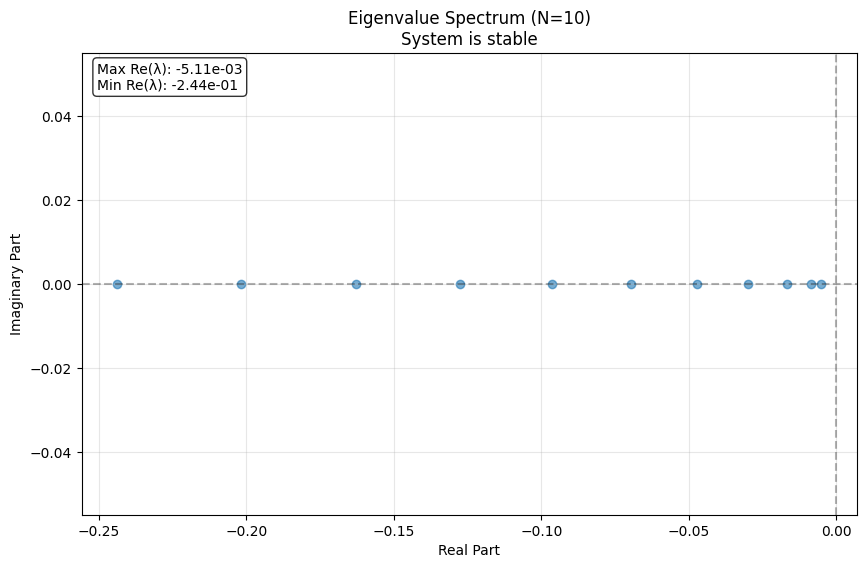


Grid size N = 10
Maximum eigenvalue: -0.005111
Minimum eigenvalue: -0.243864
System is stable


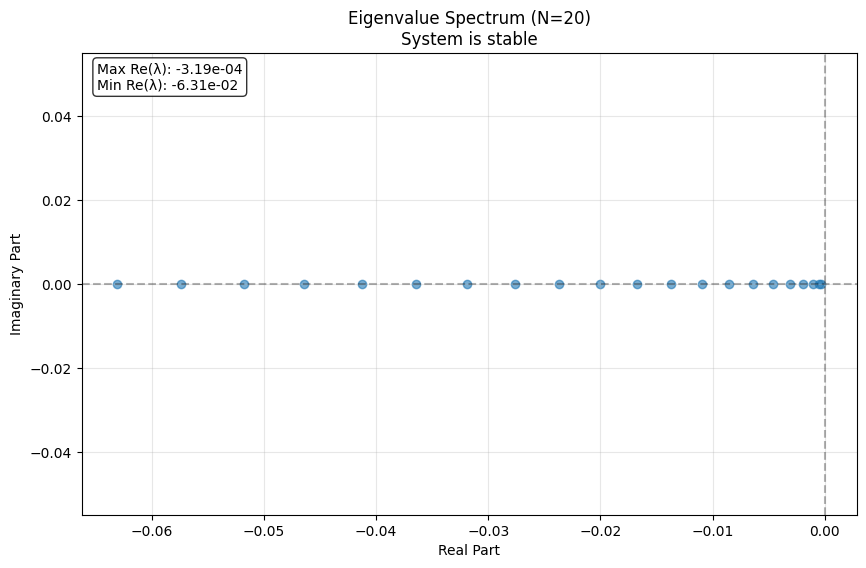


Grid size N = 20
Maximum eigenvalue: -0.000319
Minimum eigenvalue: -0.063098
System is stable


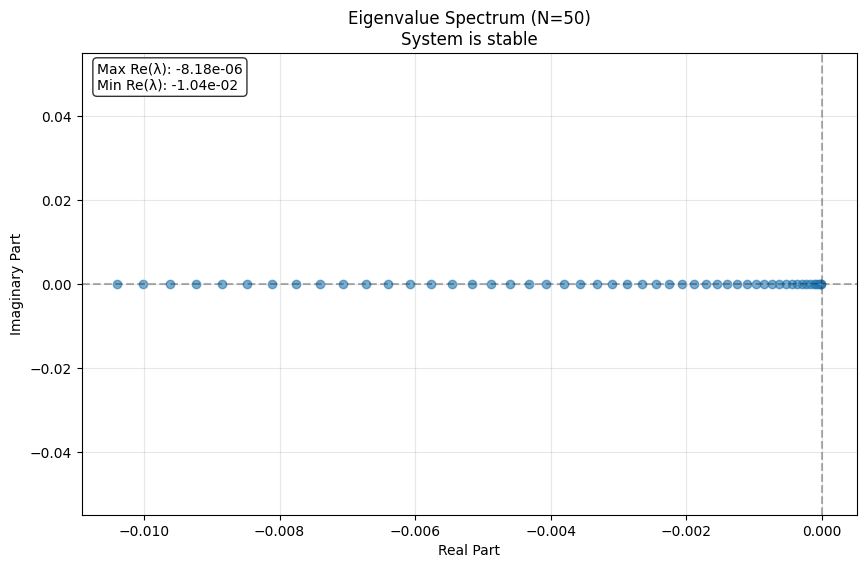


Grid size N = 50
Maximum eigenvalue: -0.000008
Minimum eigenvalue: -0.010401
System is stable


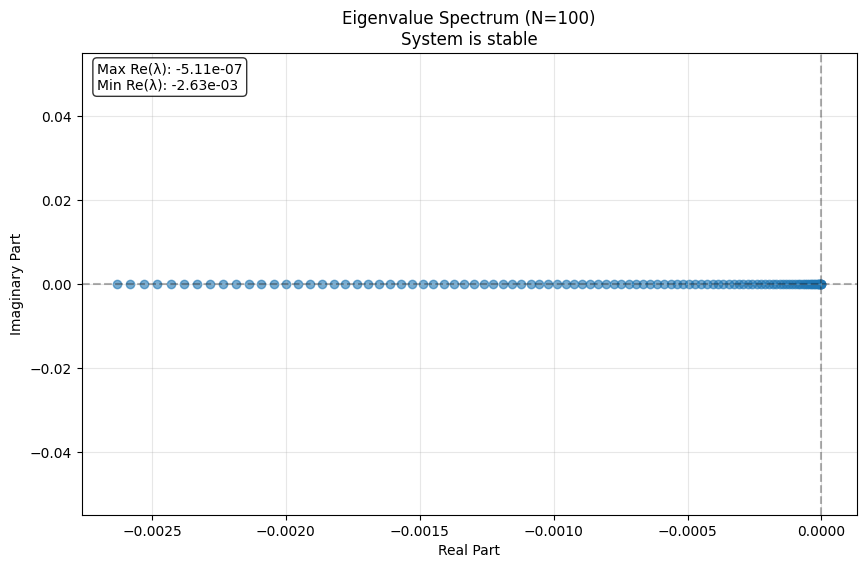


Grid size N = 100
Maximum eigenvalue: -0.000001
Minimum eigenvalue: -0.002631
System is stable


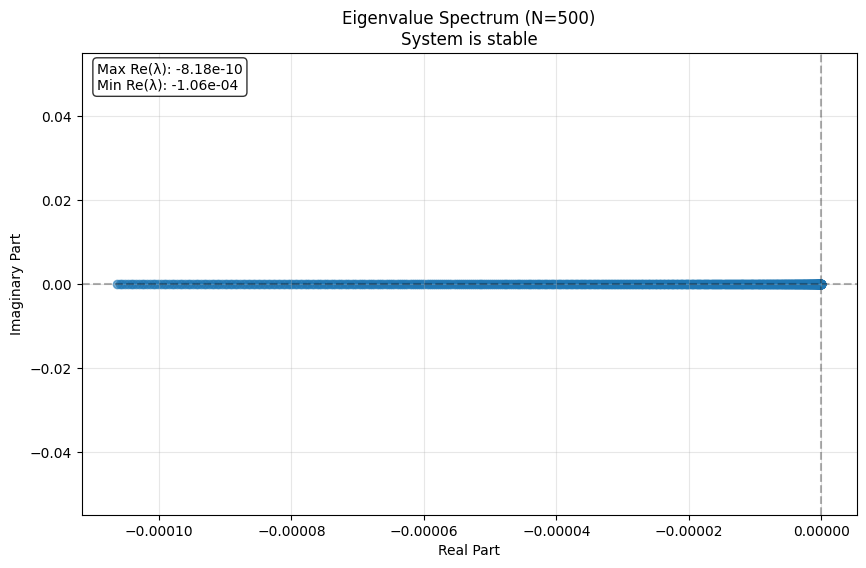


Grid size N = 500
Maximum eigenvalue: -0.000000
Minimum eigenvalue: -0.000106
System is stable


In [76]:
import numpy as np
from scipy import linalg

def create_system_matrix(N, D, Ca, Bout, h):
    """
    Create the stability matrix A' for the perturbed equation
    
    Parameters:
    -----------
    N : int
        Number of grid points (N+1 total points including boundaries)
    D : float
        Thermal conductivity coefficient
    Ca : float
        Heat capacity
    Bout : float
        Emission coefficient
    h : float
        Grid spacing (= 1/N for the interval [0,1])
        
    Returns:
    --------
    A : ndarray
        The stability matrix A'
    """
    # Initialize matrix
    A = np.zeros((N+1, N+1))
    
    # Coefficient for the matrix elements
    coeff = (Ca/D)*(2*h**2)
    #coeff = 1
    
    # Fill the matrix
    for i in range(1, N):
        x = i*h  # Current x position
        
        # Diagonal elements
        A[i,i] = coeff * ((h*(i+1))**2 + (h*(i-1))**2 - 2*h**2*Bout/D - 2)
        
        # Bottom diagonal
        A[i,i-1] = coeff * (1 - (i-1)**2*h**2)

        # Top diagonal
        A[i,i+1] = coeff * (1 - (i+1)**2*h**2)
    
    # Handle boundary conditions
    # At x = 0 (using symmetry condition)
    A[0,0] = coeff * (2*h**2*(1 - Bout/D) - 2)
    A[0,1] = coeff * (1 - h**2)
    
    # At x = 1 (using symmetry condition)
    A[N,N-1] = coeff * (1 - (N-1)**2*h**2)
    A[N,N] = coeff * (2*h**2*(N**2 + 1 - Bout/D) - 2)
    
    return A

def analyze_stability(N, D=0.3, Ca=1.0, Bout=1.45):
    """
    Analyze the stability of the system by computing eigenvalues
    
    Parameters:
    -----------
    N : int
        Number of grid points
    D : float
        Thermal conductivity coefficient (default 0.3 W/m²/K)
    Ca : float
        Heat capacity (default 1.0)
    Bout : float
        Emission coefficient (default 1.45 W/m²/K)
    
    Returns:
    --------
    eigenvals : ndarray
        Array of eigenvalues
    is_stable : bool
        True if all eigenvalues are negative (stable system)
    """
    h = 1.0/N
    
    # Create stability matrix
    A = create_system_matrix(N, D, Ca, Bout, h)
    
    # Compute eigenvalues
    eigenvals = linalg.eigvals(A)
    
    # Check stability
    is_stable = np.all(np.real(eigenvals) < 0)
    
    return eigenvals, is_stable

import matplotlib.pyplot as plt

def plot_eigenvalues(eigenvals, is_stable):
    plt.figure(figsize=(10, 6))
    plt.scatter(np.real(eigenvals), np.imag(eigenvals), alpha=0.6)
    plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)
    plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
    
    plt.title(f'Eigenvalue Spectrum (N={N})\nSystem is {"stable" if is_stable else "unstable"}')
    plt.xlabel('Real Part')
    plt.ylabel('Imaginary Part')
    
    stats = f'Max Re(λ): {np.max(np.real(eigenvals)):.2e}\n'
    stats += f'Min Re(λ): {np.min(np.real(eigenvals)):.2e}'
    plt.text(0.02, 0.98, stats, transform=plt.gca().transAxes,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.grid(True, alpha=0.3)
    plt.show()

# Test with different grid sizes
for N in [10, 20, 50, 100, 500]:
    eigenvals, is_stable = analyze_stability(N)
    max_eigenval = np.max(np.real(eigenvals))
    min_eigenval = np.min(np.real(eigenvals))
    plot_eigenvalues(eigenvals, is_stable)
    print(f"\nGrid size N = {N}")
    print(f"Maximum eigenvalue: {max_eigenval:.6f}")
    print(f"Minimum eigenvalue: {min_eigenval:.6f}")
    print(f"System is {'stable' if is_stable else 'unstable'}")

1. Analyzing modes and stability...


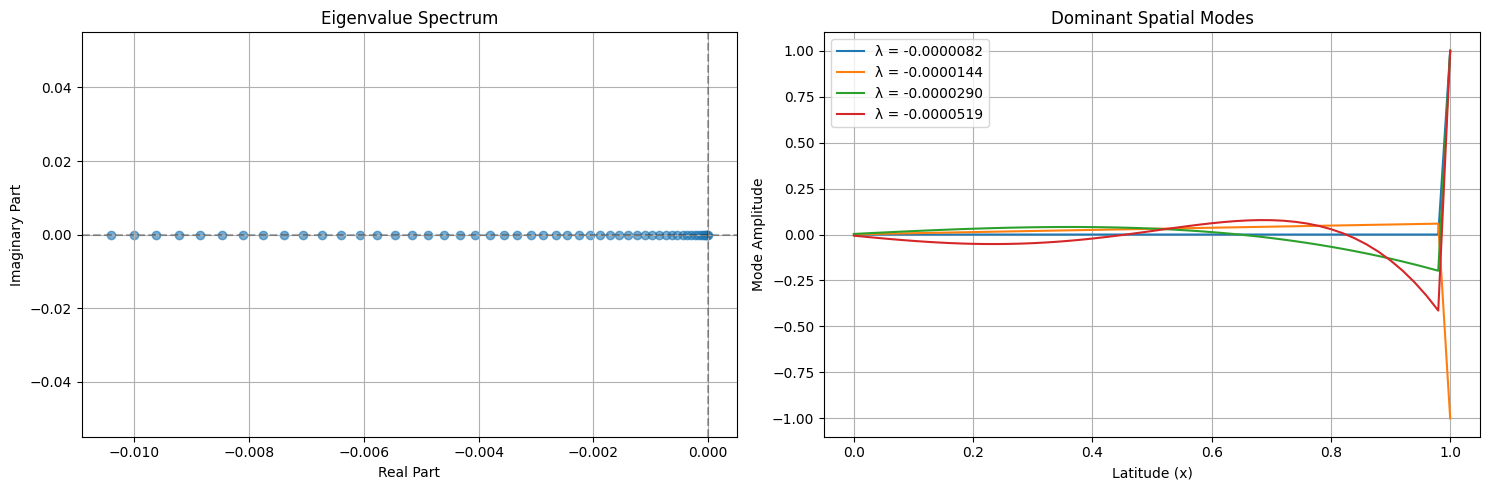


2. Running parameter sensitivity analysis...


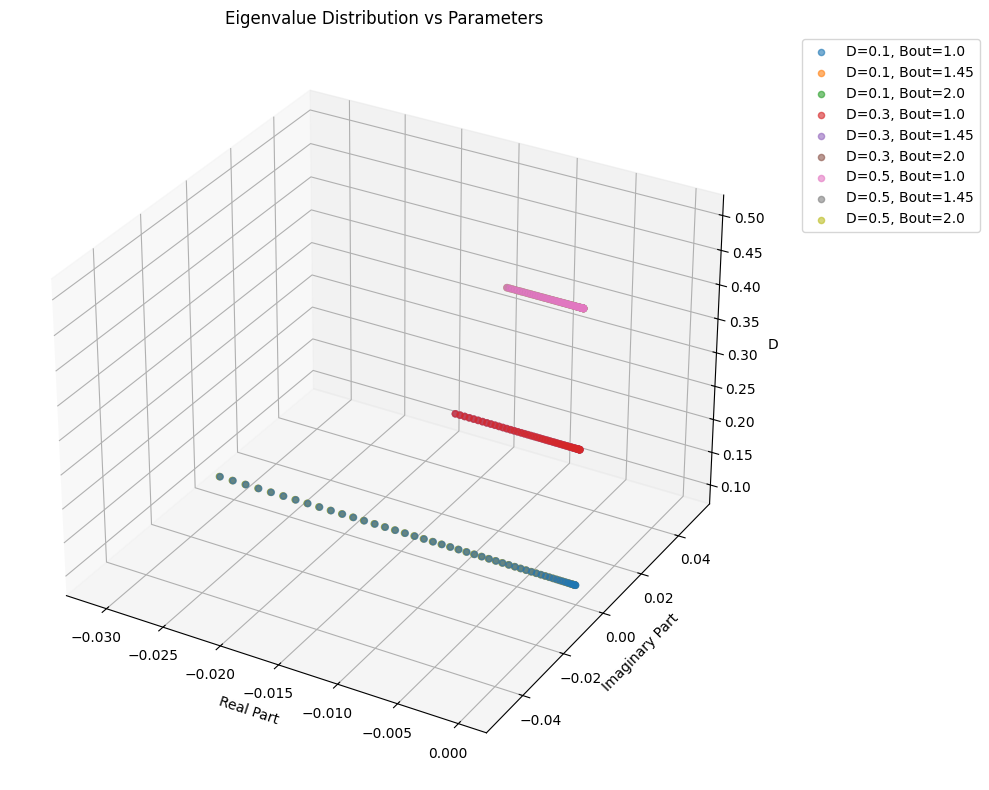


3. Visualizing time evolution...


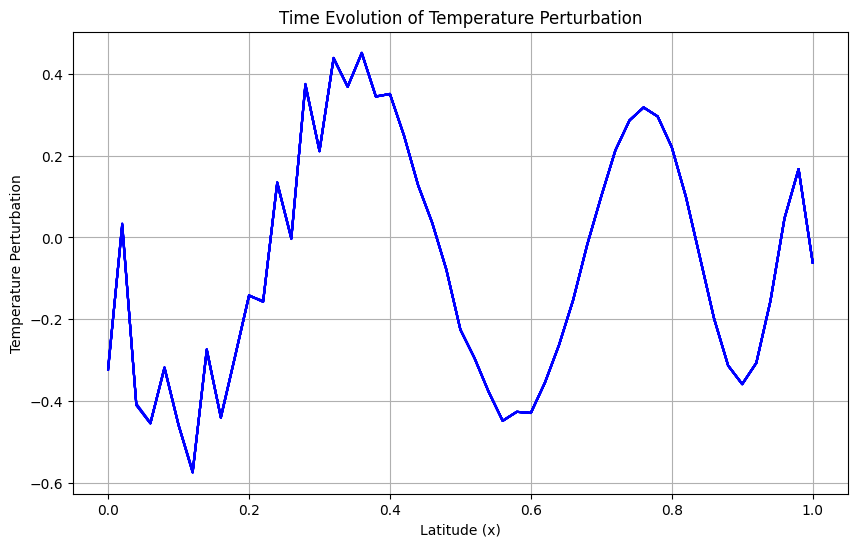

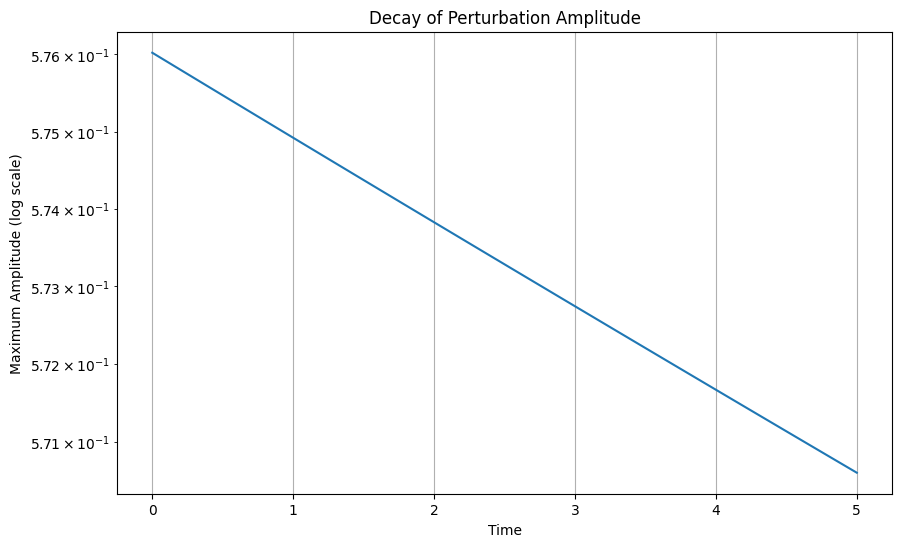


Key Metrics:
Fastest decay rate: -0.01
Slowest decay rate: -0.00
Number of oscillatory modes: 0


In [78]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def analyze_modes_and_stability(N=50, D=0.3, Ca=1.0, Bout=1.45):
    """
    Comprehensive analysis of the system's modes and stability
    """
    h = 1.0/N
    A = create_system_matrix(N, D, Ca, Bout, h)
    
    # Compute eigenvalues and eigenvectors
    eigenvals, eigenvecs = linalg.eig(A)
    
    # Sort by real part of eigenvalues
    idx = np.argsort(np.real(eigenvals))[::-1]  # Descending order
    eigenvals = eigenvals[idx]
    eigenvecs = eigenvecs[:, idx]
    
    # Create spatial grid
    x = np.linspace(0, 1, N+1)
    
    # Plot 1: Eigenvalue spectrum
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    plt.scatter(np.real(eigenvals), np.imag(eigenvals), alpha=0.6)
    plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)
    plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
    plt.title('Eigenvalue Spectrum')
    plt.xlabel('Real Part')
    plt.ylabel('Imaginary Part')
    plt.grid(True)
    
    # Plot 2: First few eigenmodes
    plt.subplot(122)
    n_modes = 4  # Number of modes to plot
    for i in range(n_modes):
        mode = np.real(eigenvecs[:, i])
        # Normalize mode
        mode = mode / np.max(np.abs(mode))
        plt.plot(x, mode, label=f'λ = {np.real(eigenvals[i]):.7f}')
    
    plt.title('Dominant Spatial Modes')
    plt.xlabel('Latitude (x)')
    plt.ylabel('Mode Amplitude')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    return eigenvals, eigenvecs, x

def parameter_sensitivity_analysis(N=50, D_range=[0.1, 0.3, 0.5], 
                                Bout_range=[1.0, 1.45, 2.0]):
    """
    Analyze system stability across different parameter values
    """
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    for D in D_range:
        for Bout in Bout_range:
            h = 1.0/N
            A = create_system_matrix(N, D, 1.0, Bout, h)
            eigenvals = linalg.eigvals(A)
            
            # Plot eigenvalues in 3D
            ax.scatter(np.real(eigenvals), np.imag(eigenvals), 
                      [D]*len(eigenvals), alpha=0.6,
                      label=f'D={D}, Bout={Bout}')
    
    ax.set_xlabel('Real Part')
    ax.set_ylabel('Imaginary Part')
    ax.set_zlabel('D')
    ax.set_title('Eigenvalue Distribution vs Parameters')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

def time_evolution_visualization(N=50, D=0.3, Ca=1.0, Bout=1.45, n_timesteps=100):
    """
    Visualize how perturbations evolve over time
    """
    h = 1.0/N
    A = create_system_matrix(N, D, Ca, Bout, h)
    eigenvals, eigenvecs = linalg.eig(A)
    
    # Create spatial grid
    x = np.linspace(0, 1, N+1)
    t = np.linspace(0, 5, n_timesteps)  # Time points
    
    # Initial perturbation (combination of first two modes)
    delta_T0 = np.real(eigenvecs[:, 0] + 0.5*eigenvecs[:, 1])
    delta_T0 = delta_T0 / np.max(np.abs(delta_T0))
    
    # Compute time evolution
    T = np.zeros((n_timesteps, N+1))
    for i, time in enumerate(t):
        T[i, :] = np.real(delta_T0 @ np.diag(np.exp(eigenvals*time)) @ np.linalg.inv(eigenvecs))
    
    # Create animation-like plot
    plt.figure(figsize=(10, 6))
    for i in range(0, n_timesteps, 5):  # Plot every 5th timestep
        alpha = 1 - i/n_timesteps  # Fade out older lines
        plt.plot(x, T[i, :], alpha=alpha, color='blue')
    
    plt.title('Time Evolution of Temperature Perturbation')
    plt.xlabel('Latitude (x)')
    plt.ylabel('Temperature Perturbation')
    plt.grid(True)
    plt.show()
    
    # Plot decay of amplitude
    plt.figure(figsize=(10, 6))
    max_amplitude = np.max(np.abs(T), axis=1)
    plt.semilogy(t, max_amplitude)
    plt.title('Decay of Perturbation Amplitude')
    plt.xlabel('Time')
    plt.ylabel('Maximum Amplitude (log scale)')
    plt.grid(True)
    plt.show()

# Run the analyses
print("1. Analyzing modes and stability...")
eigenvals, eigenvecs, x = analyze_modes_and_stability()

print("\n2. Running parameter sensitivity analysis...")
parameter_sensitivity_analysis()

print("\n3. Visualizing time evolution...")
time_evolution_visualization()

# Calculate and print some key metrics
print("\nKey Metrics:")
print(f"Fastest decay rate: {np.min(np.real(eigenvals)):.2f}")
print(f"Slowest decay rate: {np.max(np.real(eigenvals)):.2f}")
print(f"Number of oscillatory modes: {np.sum(np.abs(np.imag(eigenvals)) > 1e-10)}")